In [2]:
import os
parentdir = os.getcwd()
print(parentdir)
directory=r"D:\Research\Experimental\Analysis\2017analysis\201702\Analysis_Sebby_March_2017\S104d21Feb17_60.5_635_A2_CuAzu655";#data directory
os.chdir(directory)

D:\Research\Reports and Presentation\reports\azurin_single-molecule\Analysis


In [3]:
#Import modules
import os.path
import glob
import os
import re
from xlwt import Workbook

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from numpy import sqrt, pi, exp, linspace, loadtxt

from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
os.chdir(parentdir)
!python analysis_version_6.py
%run analysis_version_6.py

In [95]:
#*************Analysis for a specific potential********************

titel = 'average_on_and_off_time_specific_mV_Cu.xls' #name excell output file
pointnumbers = 31 #Change this to the minimal amount of points
pot = 18 #number of potentials
specific_potential = 0 #the specific potential you want the plots for
onMax=0.25;offMax=0.25;
rnge_on = [[0,onMax], [0,onMax]] #range on histograms, form: [[0,0.25], [0,0.25]] --> [xrange], [yrange]
rnge_off = [[0,offMax], [0,offMax]] #range off histograms
bins_on = 100  #bins for the on histograms
bins_off = 100 #bins for the off histograms
proteins = 'Cu' #change this to 'Zn' or 'Cu' depending on which files you are analysing. Changes title of plots.
current_dir = directory#'S101d14Feb17_60.5_635_A2_CuAzu655' #foldername you want to work in.
max_his_on = onMax
max_his_off = offMax
x_shift = 1 # t vs  t + x_shift 

average_on_and_off_times(titel, pot, pointnumbers, specific_potential, rnge_on, rnge_off, bins_on, bins_off, proteins, current_dir, max_his_on, max_his_off, x_shift)

ValueError: labels [-1] not contained in axis

In [16]:
os.chdir(parentdir)
!python analysis_version_9.py
%run analysis_version_9.py

In [61]:
# #************* on and off times********************
# os.chdir(directory)
# titel = 'average_on_and_off_time_specific_mV_Cu.xls' #name excell output file
# pointnumbers = 31 #Change this to the minimal amount of points
# pot = 16 #number of potentials
# proteins = 'Cu' #change this to 'Zn' or 'Cu' depending on which files you are analysing. Changes title of plots.
# current_dir = directory #foldername you want to work in.
# average_on_and_off_times(titel, pot, pointnumbers, proteins, current_dir)

()

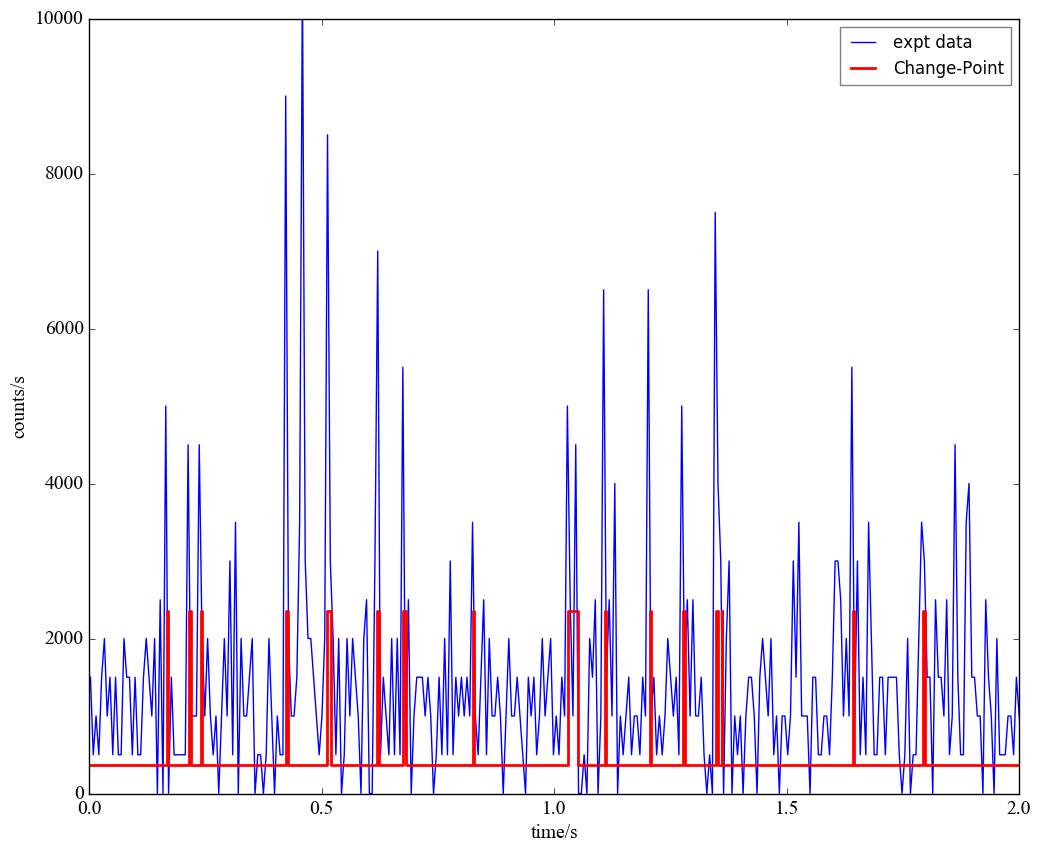

In [30]:
#************* data and changepoint plot********************
os.chdir(directory);os.chdir("Point_A2_60.5__30s_2nd_9/data/")
file1 = 'Point_A2_100mV(15)_60.5__30s_9.pt3.datn'
file2 = 'Point_A2_100mV(15)_60.5__30s_9.pt3.datn.em.plot'
x_lim_min = 0
x_lim_max = 2
y_lim_min = 0
y_lim_max = 10000

time_trace_plot(file1, file2, x_lim_min, x_lim_max, y_lim_min, y_lim_max)

In [52]:
def time_trace_plot(f_datn, f_emplot, x_lim_min, x_lim_max, y_lim_min, y_lim_max):


    # #expt data

    df = pd.read_csv(f_datn, header=None)
    binpts=5000; mi=min(df[0]); ma=mi+10;
    df_hist = histogram(df[0], bins=binpts)

    #change point

    df = pd.read_csv(f_emplot, header=None, sep='\t')
    df_diff= diff(df[0])
    #calculating Ton and Toff
    df_tag = df[[0, 1]];# df_ton = df_ton[1:]
    df_tag = pd.DataFrame([df_tag[0][1:], diff(df_tag[1])]); df_tag = df_tag.T;
    df_tag.columns = [0, 1];
    df_tag = df_tag[df_tag[1] != 0];
    df_tag.reset_index(drop=True, inplace=True);
    if df_tag[1][0] < 0:
        df_tag = df_tag[1:]
        df_tag.reset_index(drop=True, inplace=True);
    df_tag_pos = df_tag[df_tag[1]==max(df_tag[1])];df_tag_pos.reset_index(drop=True, inplace=True);
    df_tag_neg = df_tag[df_tag[1]==min(df_tag[1])];df_tag_neg.reset_index(drop=True, inplace=True);

    df_ton = df_tag_neg[0]-df_tag_pos[0];df_ton.reset_index(drop=True, inplace=True);
    t1=df_tag_pos[0][1:]; t1.reset_index(drop=True, inplace=True);
    t2=df_tag_neg[0]; t1.reset_index(drop=True, inplace=True);
    df_toff = t1 - t2; df_toff = df_toff[:df_toff.shape[0]-2];df_ton.reset_index(drop=True, inplace=True)

    df_onhist= histogram(df_ton[0], bins=100, range=(0, 0.5))
    df_offhist = histogram(df_toff[0], bins=100, range=(0, 0.5))

    figure(figsize=(12,10))
    #----time trace overlapped with change-points
    plt.plot()
    plot(df_hist[1][:-1], df_hist[0]*binpts/(ma-mi), 'b')#original data
    plot(df[0], df[1]*2, 'r', linewidth=2)#change-point analysis
    xlim(x_lim_min, x_lim_max)
    ylim(y_lim_min, y_lim_max)
    xlabel('time/s', fontsize=14, fontname='Times New Roman');
    xticks(fontsize=14, fontname='Times New Roman');
    ylabel('counts/s', fontsize=14, fontname='Times New Roman');
    yticks(fontsize=14, fontname='Times New Roman')
    legend(['expt data', 'Change-Point'], framealpha=0.5)

    return()


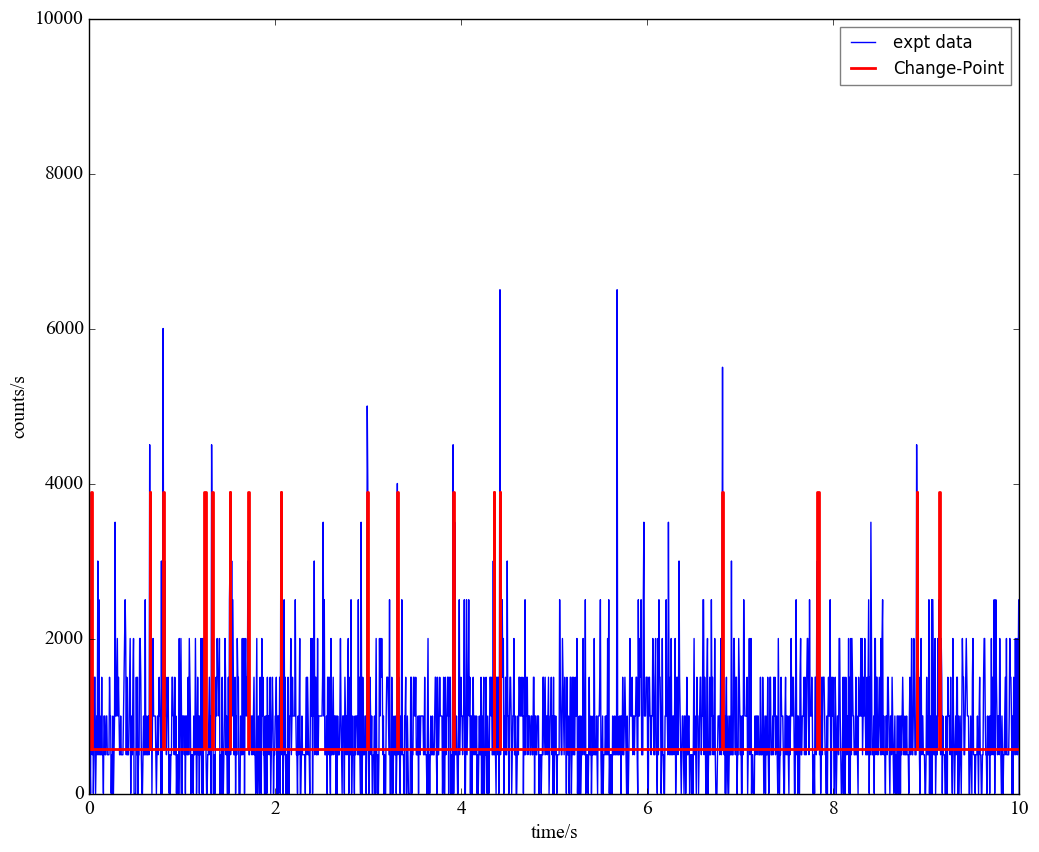

In [90]:
from IPython import display
os.chdir(directory);os.chdir("Point_A2_60.5__30s_2nd_6/data/")
file1 = 'Point_A2_100mV(15)_60.5__30s_6.pt3.datn'
file2 = 'Point_A2_100mV(15)_60.5__30s_6.pt3.datn.em.plot'
x_lim_min = 0
x_lim_max = 10
y_lim_min = 0
y_lim_max = 10000

time_trace_plot(file1, file2, x_lim_min, x_lim_max, y_lim_min, y_lim_max)